## 차원축소
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성  
- 필요성   
    - 차원이 증가할수록 데이터 포인트 간의 거리가 멀어져 희소한 구조를 가지게되어 예측 신뢰도가 떨어집니다.
    - 피처가 많을 경우 개별 피처간에 상관관계가 높은 가능성이 크며, 선형 회귀 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성으로 예측 성능이 저하됩니다.
    - 이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있기 때문에 차원축소는 중요합니다.

- 차원축소
    - 피처 선택(feature selection) : 특정 피처에 종속성이 강한 불필요한 피처는 제거하고, 데이터 특징을 잘 나타내는 주요 피처만 선택
    - 피처 추출(feature extraction) : 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것으로, 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값

- 차원축소 알고리즘
    - PCA : 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
    - SVD : 
    - NMF :

### PCA
- PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분  
  ( 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주 )
- PCA, 즉 주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 설명하는 분석기법
- 단계
    - 1. 입력 데이터 세트의 공분한 행렬을 생성
    - 2. 공분산 행렬의 고유벡터와 고유값을 계산
    - 3. 고유값이 가장 큰 순으로 K개( PCA 변환 차수만큼 )만큼 고유벡터를 추출
    - 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

In [94]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target
iris_df

#### sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화

Text(0, 0.5, 'sepal_width')

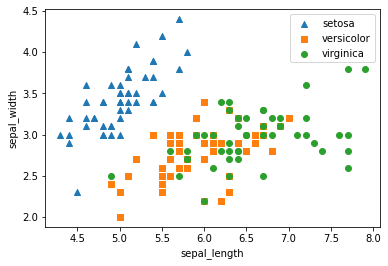

In [84]:
markers = ['^','s','o']


for i, markers in enumerate(markers):
    x_axis = iris_df[iris_df['target']==i]['sepal_length']
    y_axis = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis,y_axis,marker=markers,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


In [41]:
iris_df.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_scaled.shape

#### PCA 변환

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

In [66]:
columns= ['pca_component_1','pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns=columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


#### PCA로 차원 축소된 피처들로 데이터 산포도 시각화

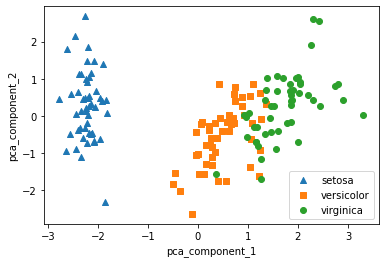

In [85]:
markers = ['^','s','o']


for i,markers in enumerate(markers):
    x_axis = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis,y_axis,marker=markers,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

#### 각 PCA Component별 변동성 비율

In [87]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


#### 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
score = cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print(score)

[0.98039216 0.92156863 0.97916667]


In [100]:
pca_x = iris_df_pca[['pca_component_1','pca_component_2']]
score_pca = cross_val_score(rcf,pca_x,iris.target,scoring='accuracy',cv=3)
print(score_pca)

[0.8627451  0.84313725 0.89583333]
